<a href="https://colab.research.google.com/github/samtam0714/ML/blob/master/KmeansIrsisExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
#Set x and y variable
x = dataset.drop('species', axis=1).values
y = dataset['species']

In [ ]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

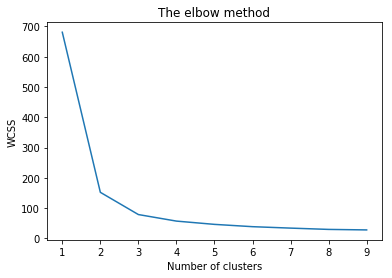

In [ ]:
#Plot Elbow Method
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#Create Silhouette Coefficients
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(x, label, metric='euclidean')
       print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6808136202936816
For n_clusters=3, The Silhouette Coefficient is 0.5525919445499757
For n_clusters=4, The Silhouette Coefficient is 0.4978256901095472
For n_clusters=5, The Silhouette Coefficient is 0.49285559183161204
For n_clusters=6, The Silhouette Coefficient is 0.36650401502359653
For n_clusters=7, The Silhouette Coefficient is 0.3577679999335413
For n_clusters=8, The Silhouette Coefficient is 0.3553784508899272
For n_clusters=9, The Silhouette Coefficient is 0.3296293821833829


In [ ]:
#Create KMeans with 3 Clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [ ]:
#Apply KMeans clustering
y_kmeans = kmeans.fit_predict(x)

In [ ]:
#Add Prediction column to dataset
dataset['Prediction']=kmeans.labels_
dataset['Prediction'] = dataset['Prediction'].map({0:'setosa', 1:'versicolor',2:'virginica'}) 
dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Prediction
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa
5,5.4,3.9,1.7,0.4,setosa,setosa
6,4.6,3.4,1.4,0.3,setosa,setosa
7,5.0,3.4,1.5,0.2,setosa,setosa
8,4.4,2.9,1.4,0.2,setosa,setosa
9,4.9,3.1,1.5,0.1,setosa,setosa


In [ ]:
#Evaluate the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['setosa','versicolor','virginica']
print(confusion_matrix(dataset['species'],dataset['Prediction']))  
print(classification_report(dataset['species'],dataset['Prediction'],target_names=target_names))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.77      0.96      0.86        50
  virginica       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



In [ ]:
#Alternative - Crosstabs
pd.crosstab(dataset.species, dataset.Prediction,margins=True)

Prediction,setosa,versicolor,virginica,All
species,,,,
setosa,50,0,0,50
versicolor,0,48,2,50
virginica,0,14,36,50
All,50,62,38,150


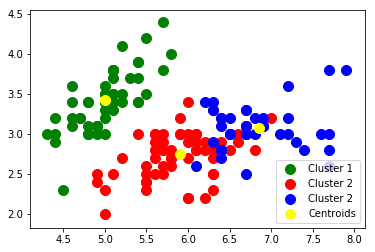

In [ ]:
#Plot of Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()